In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./phone_usage_cleaned.csv')
df = df.drop(['Unnamed: 0', 'User ID', 'Phone Brand', 'Location', 'OS', 'Gender'], axis = 1)
df.head()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,53,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,60,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,37,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,32,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,16,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
from scipy.stats import zscore
df1 = df.drop('Primary Use', axis = 1)
df2 = df1.apply(zscore)

In [5]:
link_method = linkage(df2, method = 'average')

In [6]:
from scipy.cluster.hierarchy import fcluster
link_method = linkage(df.iloc[:,1:9], method = 'average')
clusters1 = fcluster(link_method, 5, criterion='maxclust')
clusters2 = fcluster(link_method, 10, criterion='distance')

In [14]:
clusters1 =  pd.DataFrame(clusters1)
clusters1.nunique()

0    5
dtype: int64

In [13]:
clusters2 = pd.DataFrame(clusters2)
clusters2.nunique()

0    17556
dtype: int64

In [10]:
df['Cluster'] = clusters1

<Axes: xlabel='Cluster'>

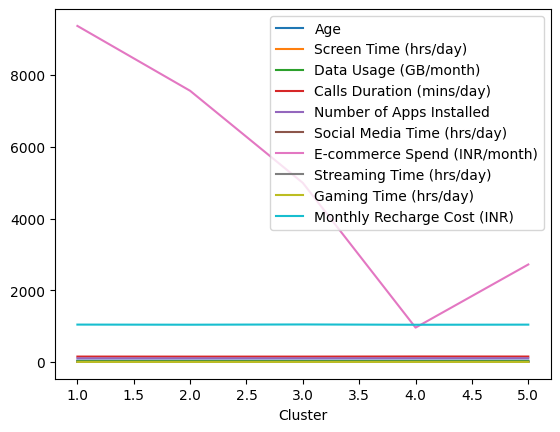

In [11]:
df1 = df.drop('Primary Use', axis = 1)

df1.groupby('Cluster').mean().plot(kind = 'line')

In [15]:
df1.groupby('Cluster').mean()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
Cluster,,,,,,,,,,
1,37.656596,6.505957,25.369915,151.597702,102.935319,3.227191,9371.883830,4.242128,2.508553,1043.650638
2,37.801368,6.577306,25.574664,150.002359,103.682708,3.265629,7562.858457,4.242133,2.480868,1040.278132
3,37.412584,6.502576,25.247403,150.392061,104.482052,3.210600,4994.396537,4.222192,2.516575,1047.346284
4,37.283088,6.521156,25.226103,153.704278,105.484291,3.286464,958.978610,4.289405,2.473563,1038.910762
5,37.769368,6.619620,25.629267,152.421846,106.216385,3.281686,2719.904720,4.272722,2.470377,1042.365984


In [16]:
df['Cluster'] = clusters2

In [35]:
import matplotlib.pyplot as plt
df1 = df.drop('Primary Use', axis = 1)


<Axes: xlabel='Cluster'>

<Figure size 1500x500 with 0 Axes>

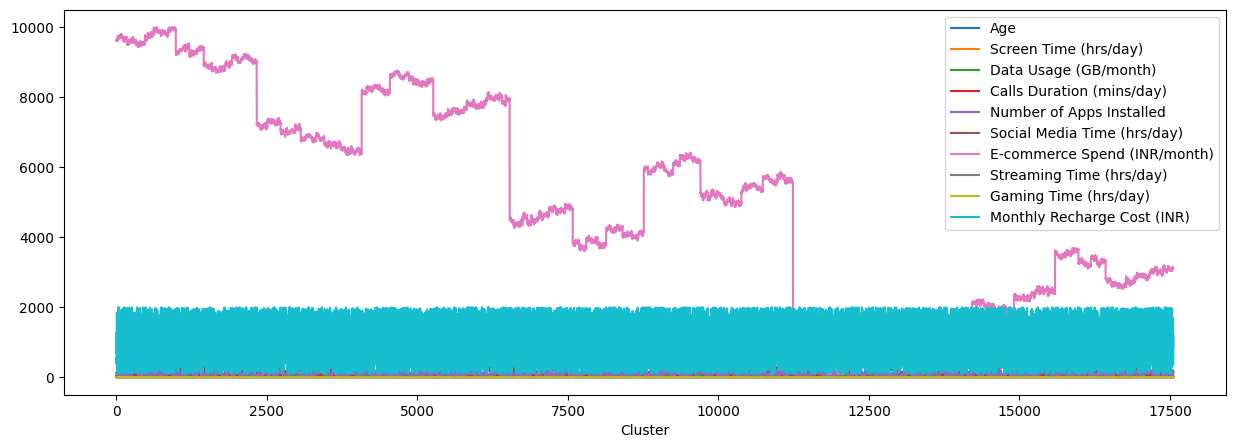

In [34]:
plt.figure(figsize = (15,5))
df1.groupby('Cluster').mean().plot(kind = 'line', figsize=(15, 5))

In [20]:
df

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Cluster
0,53,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,11337
1,60,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,10122
2,37,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,15221
3,32,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,13207
4,16,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,11978
...,...,...,...,...,...,...,...,...,...,...,...,...
17681,27,7.2,36.6,90.4,81,5.1,4007,3.8,3.3,1380,Entertainment,8601
17682,40,9.5,12.9,243.0,166,4.3,8550,3.4,0.7,222,Education,4757
17683,34,1.1,48.9,74.7,70,5.3,5516,0.7,4.0,1612,Entertainment,10605
17684,22,8.8,25.6,105.6,96,2.4,3614,6.6,0.8,1528,Work,15810


In [15]:
from sklearn.cluster import KMeans 

In [24]:
k_means2 = KMeans(n_clusters = 3)
k_means2.fit(df2)
k_means2.labels_

array([2, 2, 2, ..., 2, 0, 1], dtype=int32)

In [25]:
k_means2.inertia_

155439.56797140214

In [17]:
wss =[] 

In [18]:
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(df2)
    wss.append(KM.inertia_)

In [19]:
import seaborn as sns

In [23]:
len(wss)

14

<Axes: >

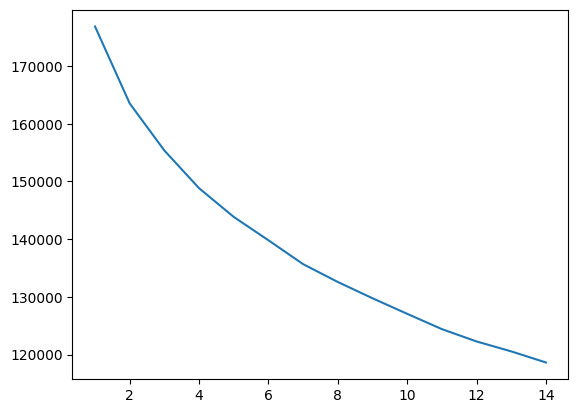

In [25]:
a = np.arange(1, 15, 1)
sns.lineplot(x = a, y = wss)

In [27]:
import matplotlib.pyplot as plt

In [29]:
wss2 = []
for i in range(1,31):
    KM = KMeans(n_clusters=i)
    KM.fit(df2)
    wss2.append(KM.inertia_)



<Axes: >

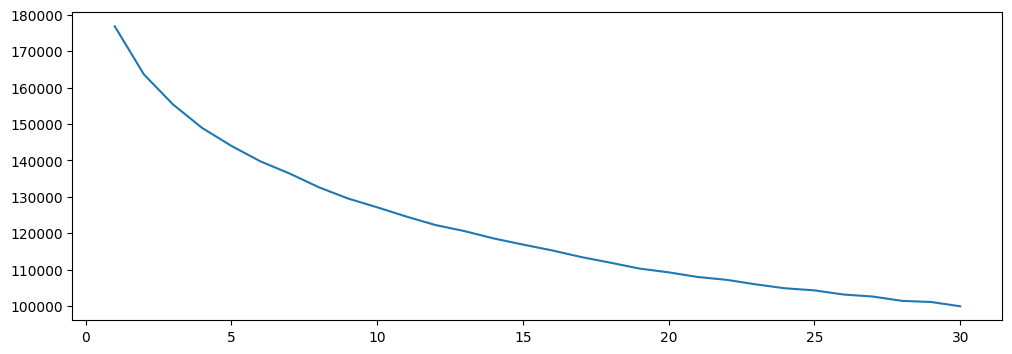

In [30]:
plt.figure(figsize = (12, 4))
b=  np.arange(1, 31, 1)
sns.lineplot(x = b, y = wss2)

In [31]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df2)
labels = k_means.labels_

In [32]:
labels

array([2, 2, 1, ..., 0, 0, 2], dtype=int32)

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [34]:
silhouette_score(df2,labels,random_state=1)

np.float64(0.06323097663811254)

In [35]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df2)
labels = k_means.labels_

In [36]:
silhouette_score(df2,labels,random_state=1)

np.float64(0.06760200864175232)

In [37]:
k_means = KMeans(n_clusters = 15 ,random_state=1)
k_means.fit(df2)
labels = k_means.labels_

In [38]:
silhouette_score(df2,labels,random_state=1)

np.float64(0.06932792325033442)